In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
star = pd.read_csv('cleaned_star_data.csv')
star.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [48]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


Observations
1) Dataset consists of 240 rows, 6 feature and 1 target columns,

Absolute Temperature (in K)
Relative Luminosity (L/Lo)
Relative Radius (R/Ro)
Absolute Magnitude (Mv)
Star Color
Spectral Class
Star Type (Target classes)
Here,

Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
Ro = 6.9551 x 10^8 m (Avg Radius of Sun)
2) Two categorical features (object type) which will need some kind of encoding,

Star Color
Spectral Class
3) It consists of some different features of stars. Information on the star type is given below,

0 → Brown Dwarf
1 → Red Dwarf
2 → White Dwarf
3 → Main Sequence
4 → Supergiants
5 → Hypergiants

In [49]:
folder = 'star_plot'
os.makedirs(folder,exist_ok=True)
base_dir = f'/content/{folder}/'

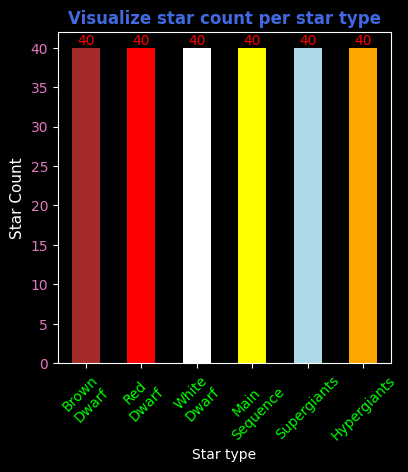

In [50]:
plt.figure(figsize=(4.3,4.3))
plt.style.use('dark_background')
ax=star['Star type'].value_counts().plot(kind='bar',color=['brown','red','white','yellow', 'lightblue', 'orange'])
ax.bar_label(ax.containers[0], color='red')
plt.title('Visualize star count per star type', color='royalblue', weight='bold')
plt.yticks(color='tab:pink')
plt.ylabel('Star Count', color='white', fontsize=11)
plt.xticks(ticks=[0,1,2,3,4,5],
           labels = ['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence', 'Supergiants', 'Hypergiants'],
           rotation=45,color='lime')
plt.savefig(base_dir+'star_type.png')
plt.show()

<ipython-input-51-62b63ee2a3c6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=star['Star color'].value_counts().index,


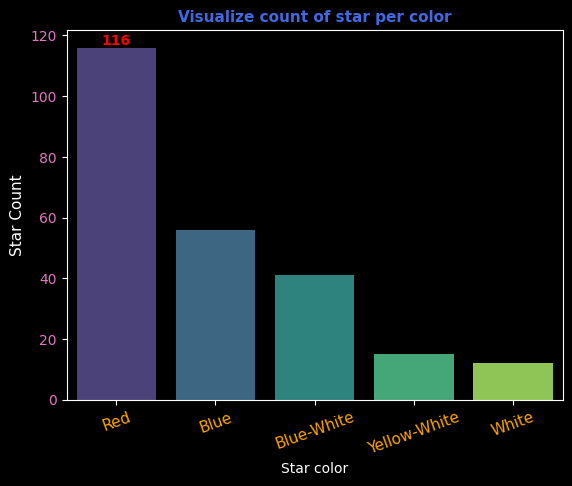

In [51]:
ax = sns.barplot(x=star['Star color'].value_counts().index,
                 y=star['Star color'].value_counts().values,
                 palette='viridis')
ax.bar_label(ax.containers[0], color='red',weight='bold')
plt.title('Visualize count of star per color', color='royalblue', weight='bold', fontsize=11)
plt.xticks(rotation=20,color='orange',fontsize=11)
plt.ylabel('Star Count', color='white', fontsize=11)
plt.yticks(color='tab:pink')
plt.savefig(base_dir+'star_color.png')
plt.show()

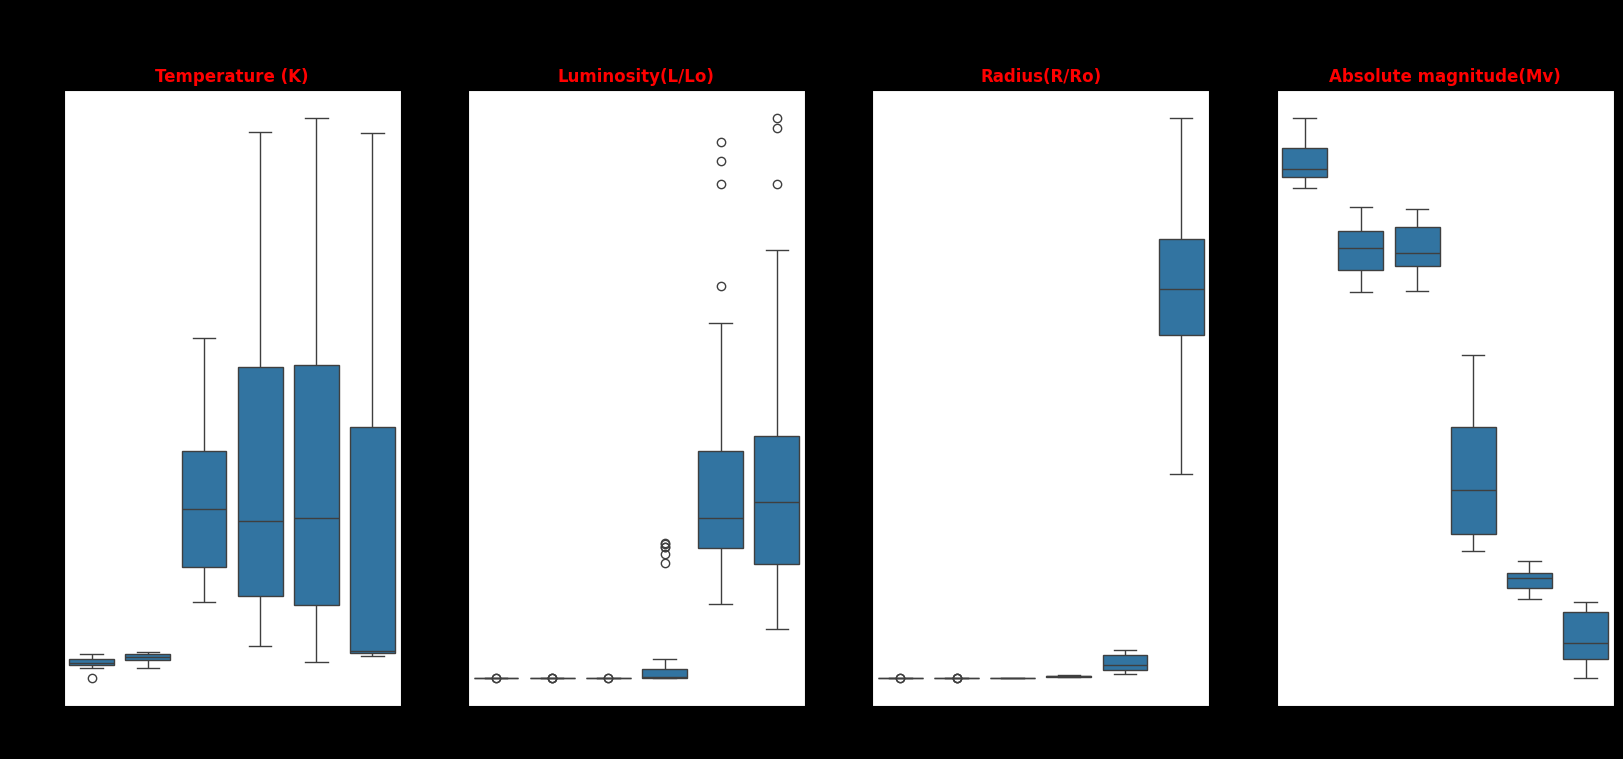

In [52]:
plt.figure(figsize=(20,8))
plt.style.use('default')
plt.suptitle('Visualizing the outliers in numeric features of star type',
             color='black',weight='bold',fontsize=15)

for i in range(4):
  plt.subplot(1,4,i+1)
  sns.boxplot(x=star['Star type'], y=star.iloc[:,i])
  plt.title(star.columns[i], color='red', weight='bold')
  plt.ylabel('')

plt.savefig(base_dir+'outliers.png')
plt.show()

In [56]:
def line_plot(star,colors,i):
  plt.subplot(4,1,i+1)
  plt.plot(star.iloc[:,i],color=colors[i])
  plt.title(star.columns[i],color='black',weight='bold')

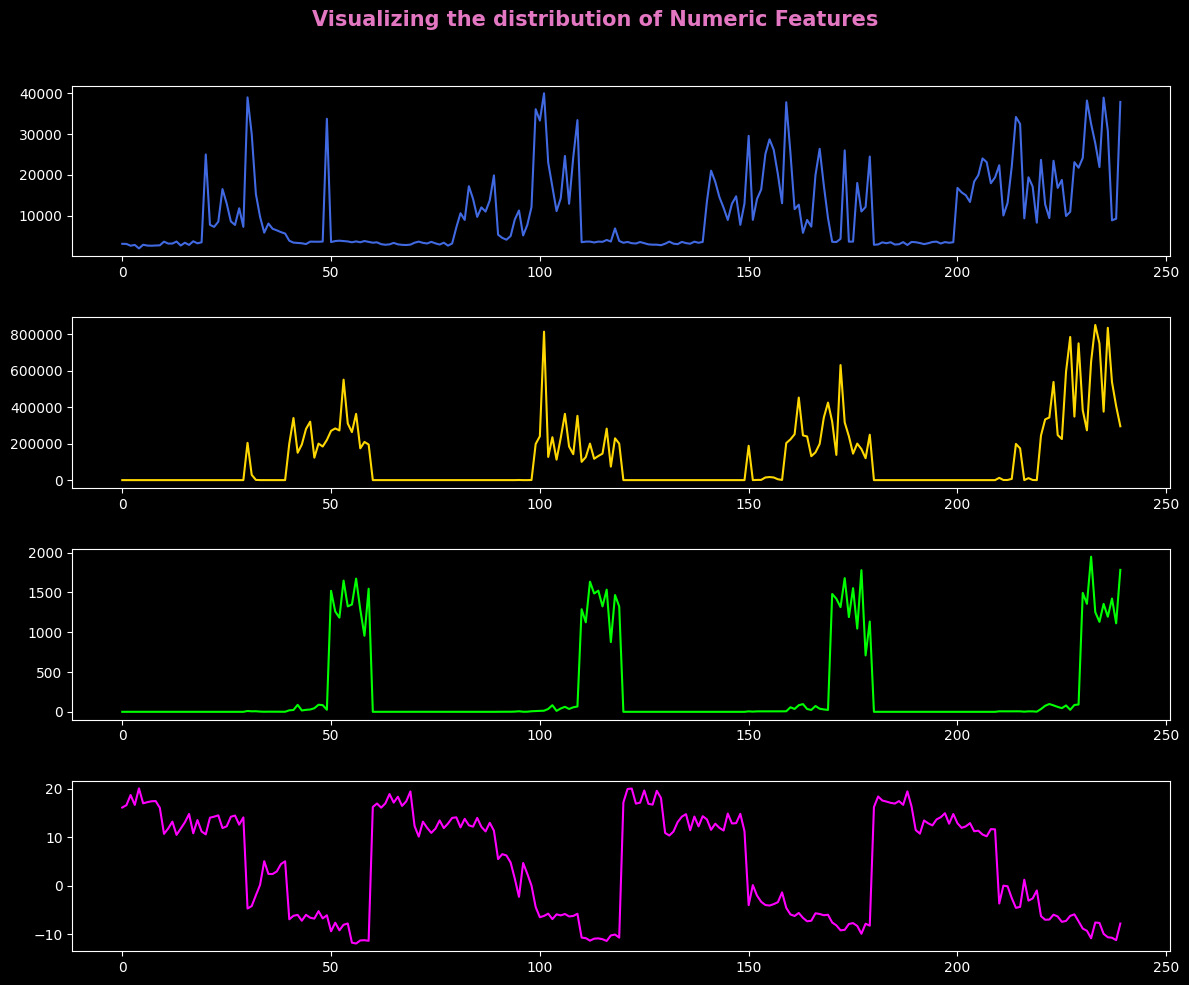

In [57]:
colors = ['royalblue', 'gold', 'lime', 'magenta']

plt.figure(figsize=(12,10))
plt.style.use('dark_background')
plt.suptitle('Visualizing the distribution of Numeric Features\n',
             color='tab:pink', fontsize=15, weight='bold')

for i in range(4):
  line_plot(star,colors,i)

plt.tight_layout()
plt.savefig(base_dir+'line_subplot.png',facecolor='black', edgecolor='black')
plt.show()

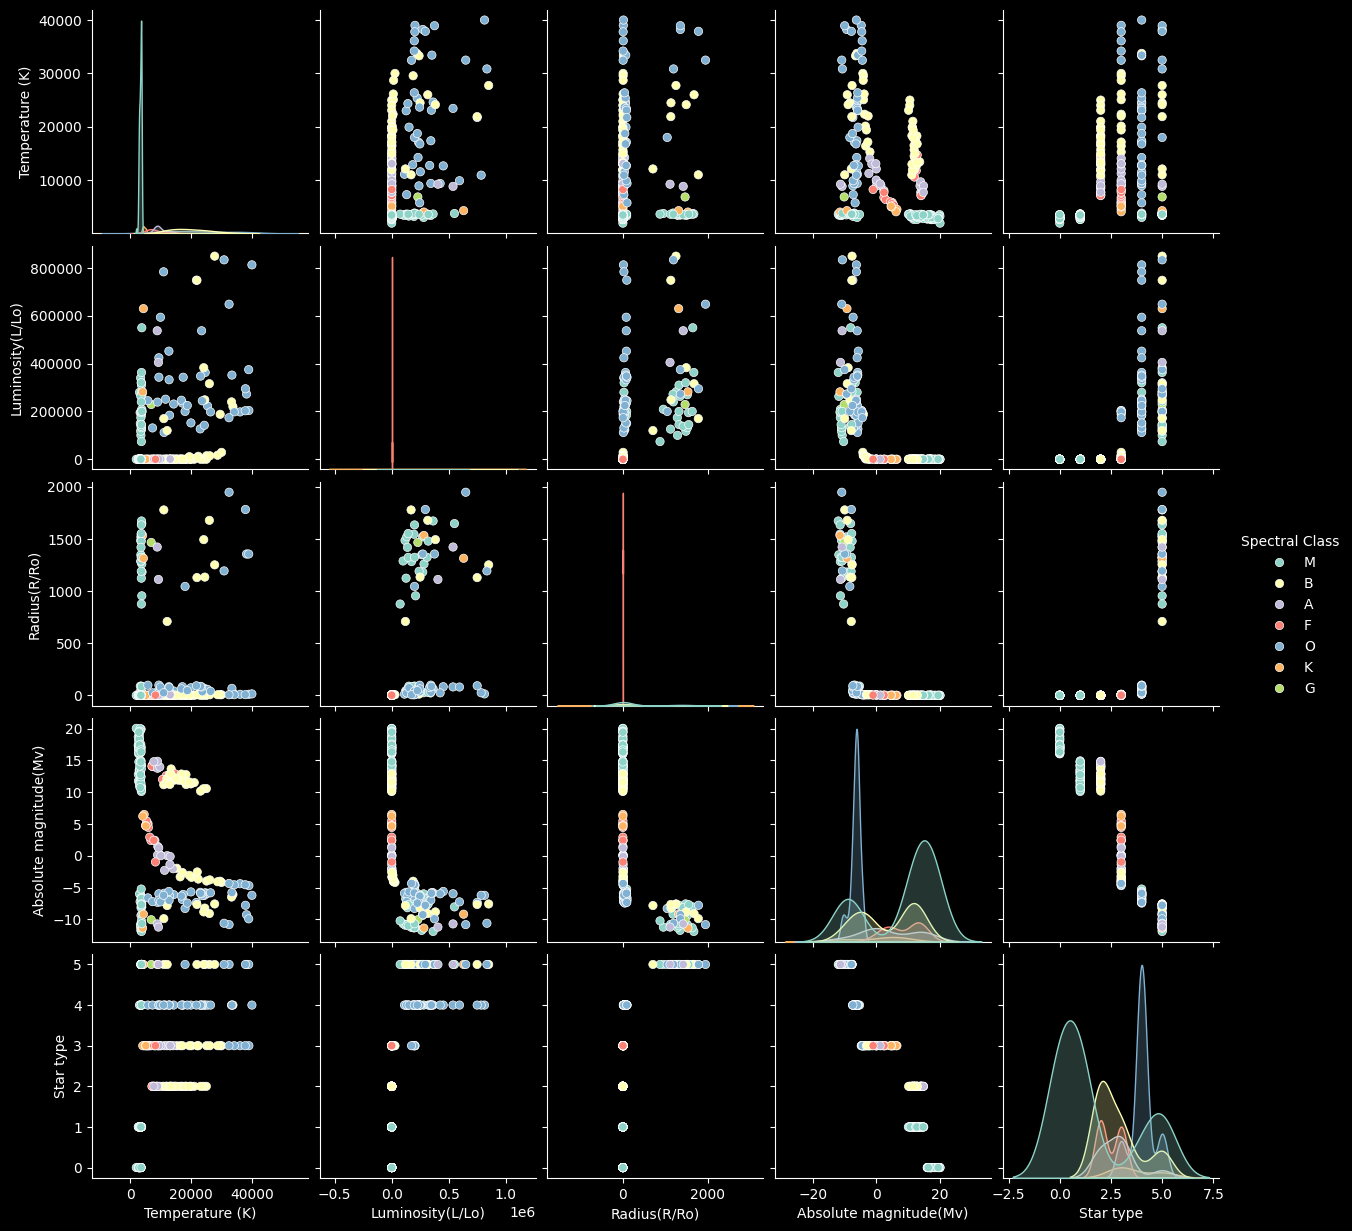

In [58]:
plt.style.use('dark_background')
sns.pairplot(star, hue='Spectral Class')
plt.savefig(base_dir+'pairplot.png')
plt.show()

In [59]:
star_type = star['Star type'].values
temperature = star['Temperature (K)'].values
abs_mag = star['Absolute magnitude(Mv)'].values


star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'}
}

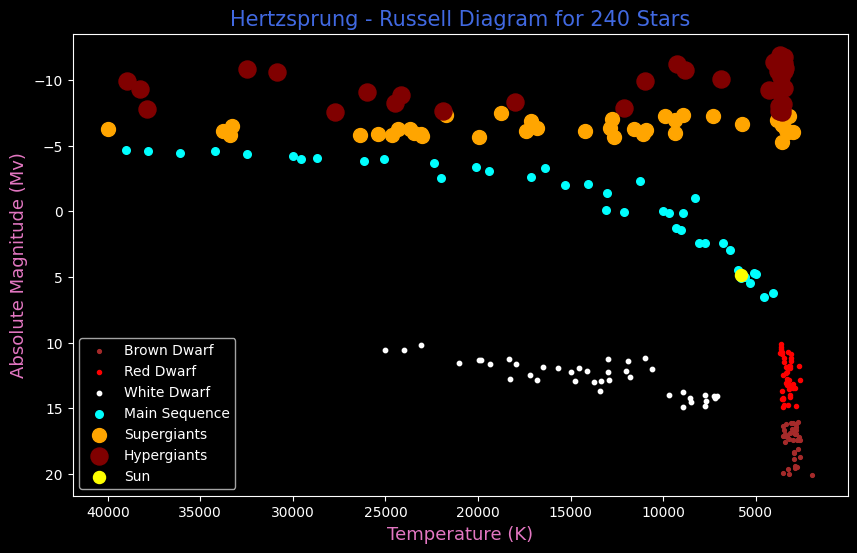

In [60]:
axes = []
labels = set()

plt.figure(figsize=(10,6))
plt.style.use('dark_background')
for i in range(len(star_type)):
  properties = star_types[star_type[i]]
  if properties['label'] not in labels:
    ax = plt.scatter(temperature[i], abs_mag[i],
                     s=properties['size'],
                     c=properties['color'],
                     marker=properties['marker'],
                     label=properties['label'])
    axes.append(ax)
    labels.add(properties['label'])

  else:
    plt.scatter(temperature[i], abs_mag[i],
                s=properties['size'],
                c=properties['color'],
                marker=properties['marker'],
                label=properties['label'])
ax_sun = plt.scatter(5778, 4.83, s=75,c='yellow',marker='o',label='Sun')
axes.append(ax_sun)
labels.add('Sun')

# Add title
plt.title(f"Hertzsprung - Russell Diagram for {len(star_type)} Stars", fontsize=15, color='royalblue')

# Add labels
plt.ylabel("Absolute Magnitude (Mv)", fontsize=13, color='tab:pink')
plt.xlabel("Temperature (K)", fontsize=13, color='tab:pink')

# Visualize the labels only for the axes handles
plt.legend(handles=axes)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()


plt.savefig(base_dir+'hr_diagram.png',facecolor='black', edgecolor='black')
plt.show()

In [61]:
from google.colab import files
!zip -r /content/star_plots.zip /content/star_plot
files.download('/content/star_plots.zip')

updating: content/star_plot/ (stored 0%)
updating: content/star_plot/star_color.png (deflated 10%)
updating: content/star_plot/outliers.png (deflated 33%)
updating: content/star_plot/hr_diagram.png (deflated 6%)
updating: content/star_plot/pairplot.png (deflated 3%)
updating: content/star_plot/line_subplot.png (deflated 8%)
updating: content/star_plot/star_type.png (deflated 8%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>